In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the Data**

In [2]:
df = pd.read_csv('./Superstore.csv', encoding="windows-1252")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# **Handle missing values**

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
#Duplicates
df.duplicated().sum()

0

# **Explore individual columns**

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### **Distribution of Sales**

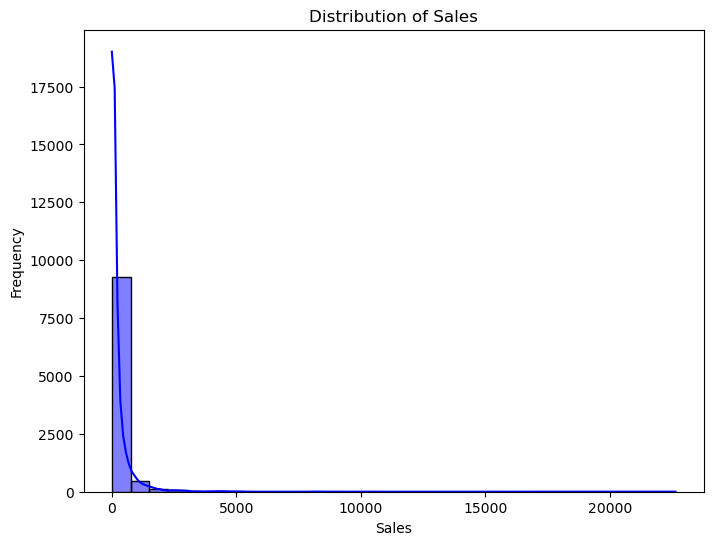

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

- The graph is heavily right-skewed
- Most of the sales are approximately in range of 0-1000$
- The mean might be disproportionately affected by the outliers
- The outliers need further investigation to understand what drives such significant transactions

- The majority of transactions are relatively low in value. This could indicate a high volume of small-scale purchases rather than big-scale items driving revenue.
- The outliers, despite being rare, could greatly contribute to total revenue
- Identifying products, regions or customer segments associated with these outliers could greatly help in optimizing business strategy

In [18]:
high_sales = df[df['Sales'] > df['Sales'].quantile(0.99)]
high_sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
27,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.50,-1665.0522
165,166,CA-2014-139892,9/8/2014,9/12/2014,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.40,-1359.9920
251,252,CA-2016-145625,9/11/2016,9/17/2016,Standard Class,KC-16540,Kelly Collister,Consumer,United States,San Diego,...,92037,West,TEC-AC-10003832,Technology,Accessories,Logitech P710e Mobile Speakerphone,3347.370,13,0.00,636.0003
262,263,US-2014-106992,9/19/2014,9/21/2014,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,...,77036,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,3059.982,3,0.40,-509.9970
263,264,US-2014-106992,9/19/2014,9/21/2014,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,...,77036,Central,TEC-MA-10003353,Technology,Machines,Xerox WorkCentre 6505DN Laser Multifunction Pr...,2519.958,7,0.40,-251.9958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,9650,CA-2016-107104,11/26/2016,11/30/2016,Standard Class,MS-17365,Maribeth Schnelling,Consumer,United States,Los Angeles,...,90045,West,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,3406.664,8,0.15,160.3136
9660,9661,CA-2016-160717,6/6/2016,6/11/2016,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Santa Barbara,...,93101,West,TEC-PH-10001459,Technology,Phones,Samsung Galaxy Mega 6.3,3023.928,9,0.20,226.7946
9741,9742,CA-2015-117086,11/8/2015,11/12/2015,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,5408,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.900,5,0.00,1013.1270
9857,9858,CA-2015-164301,3/26/2015,3/30/2015,Standard Class,EB-13840,Ellis Ballard,Corporate,United States,Seattle,...,98103,West,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,3393.680,8,0.00,610.8624


### **Distribution of Profit**

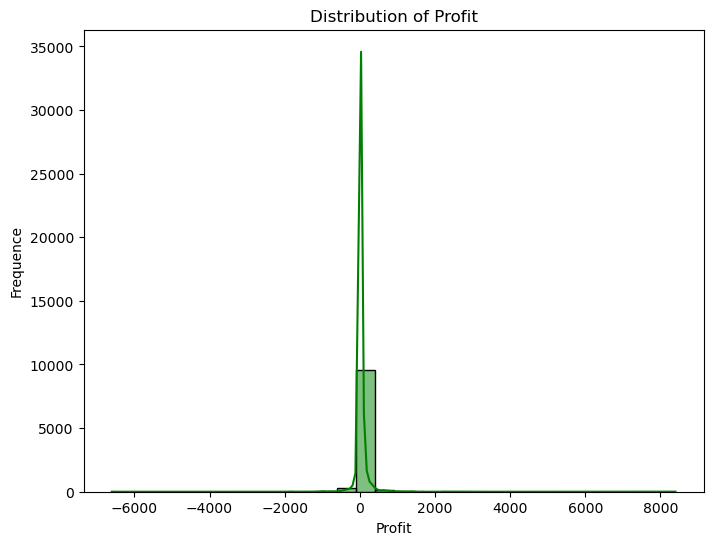

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(df['Profit'], bins=30, kde=30, color='green')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequence')
plt.show()

- Profit is mostly in the range of up to 750$
- There are both positive & negative values indicating that some transactions incur losses
- Right-skewed with losses, indicating that while there are many positive profit values, there is a notable left tail extending into negative profit values
- Most transactions uield moderate profits, indicating that the company might rely on high sales volumes to generate value
- Many small losses might be due to factors like over-discounting or high operational costs

### **Discount Analysis**

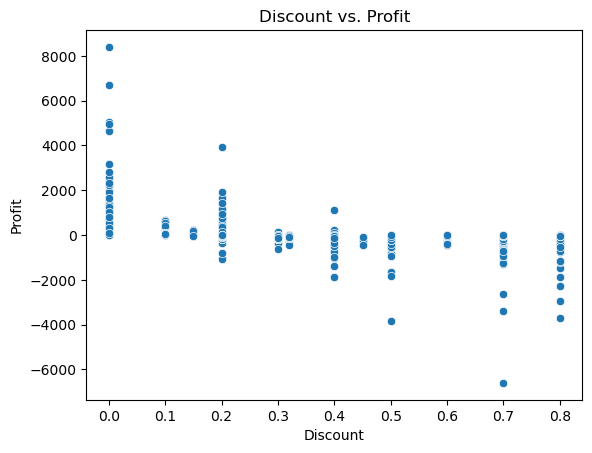

In [19]:
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs. Profit')
plt.show()

The scatterplot clearly suggests that discounts greater than 20% start bearing losses and discount greater than 50% are not profitable at all.

# **Bivariate Analysis**

### Sales & Profit

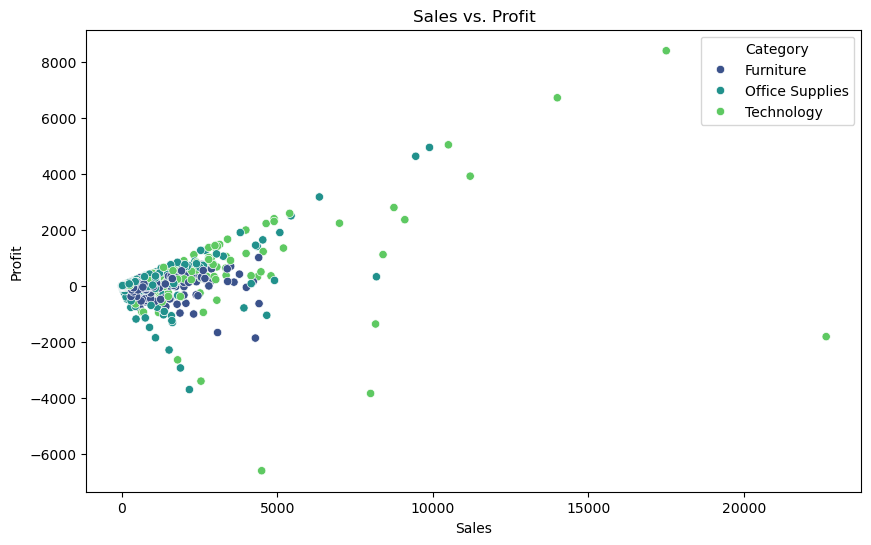

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category', palette='viridis')
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

We can see that categories like furniture & office supplies do not bring a lot of profit, but are responsible for the majority of sales. Techonology on the other hand brings the largest profit

### **Correlation heatmap for numerical columns**

In [13]:
df_num = df[['Sales', 'Quantity', 'Discount', 'Profit']].copy()

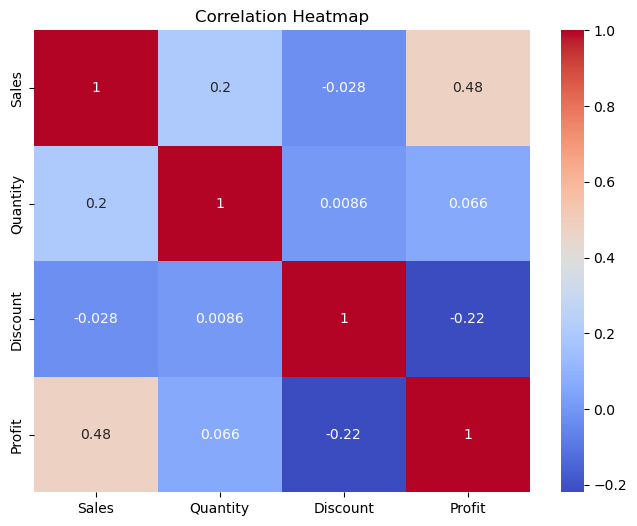

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Segmentation Analysis**

### **Sales and Profit by region**

In [16]:
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
region_summary

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
South,391721.9050,46749.4303
Central,501239.8908,39706.3625
